In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
# sns.set()

# 그래프 기본 설정
from matplotlib.colors import Normalize
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [12]:
df = pd.read_csv('raw/GRDP/1인당_GRDP_시도__20250722161306.csv')
df_m = pd.read_csv('전처리/주택소유율에따른_경제안정성과고용률.csv')

In [13]:
df.columns = ['시도', '연도', 'GRDP_인당']

### 1. 연도를 정수 타입으로 변환한다.

In [23]:
df['연도'] = df['연도'].str.replace(' p)', '')
df['연도'] = df['연도'].astype(int)

### 2 연도를 기존 데이터에 맞춘다.

In [25]:
df = df.loc[df['연도'].isin(df_m['연도'].value_counts().index)]

### 3. 누락된 세종시 데이터를 0으로 채운다.

In [31]:
df['연도'].value_counts(sort = False)

연도
2006    17
2008    17
2010    17
2012    17
2014    18
2016    18
2017    18
2018    18
2019    18
2020    18
2021    18
2022    18
2023    18
Name: count, dtype: int64

In [32]:
# 누락된 연도
missing_years = [2006, 2008, 2010, 2012]
sejong_rows = [{'시도': '세종특별자치시', '연도': y, 'GRDP_인당': 0} for y in missing_years]

# 데이터프레임 생성 후 기존 df_grdp2에 추가
df = pd.concat([df, pd.DataFrame(sejong_rows)], ignore_index=True)

# 정렬 및 인덱스 재설정
df = df.sort_values(by=['시도', '연도']).reset_index(drop=True)

### 4. 시도명을 기존 데이터에 맞춘다.

In [49]:
# 전북특별자치도를 전라북도로 변경한다.
df['시도'] = df['시도'].replace('전북특별자치도', '전라북도')

In [ ]:
10/0

In [53]:
df.to_csv('전처리/1인당GRDP_전처리_병합용.csv', index = False)

In [5]:
df_m

,연도,시도,자가점유가구비율,GRDP,고용률,GRDP_백만
0,2006,전국,55.60,1349602329,60.0,1349.602329
1,2008,전국,56.40,1465186371,59.8,1465.186371
2,2010,전국,54.30,1581956002,58.9,1581.956002
3,2012,전국,53.80,1677574227,59.6,1677.574227
4,2014,전국,53.60,1790169111,60.5,1790.169111
...,...,...,...,...,...,...
229,2019,제주특별자치도,58.10,22951902,68.4,22.951902
230,2020,제주특별자치도,58.60,21668785,67.1,21.668785
231,2021,제주특별자치도,56.60,22346390,67.4,22.346390
232,2022,제주특별자치도,56.84,23364427,69.9,23.364427


In [54]:
df_m = pd.merge(df, df_m, on=['시도', '연도'], how='inner')

In [56]:
df_m.pop('GRDP')
df_m.pop('GRDP_백만')

0      269.977343
1      297.689149
2      332.441726
3      361.810379
4      399.546067
          ...    
216     77.100362
217     75.771650
218     80.225958
219     83.583153
220     83.254787
Name: GRDP_백만, Length: 221, dtype: float64

In [59]:
df_m.iloc[:, 2:].corr()

,GRDP_인당,자가점유가구비율,고용률
GRDP_인당,1.000000,0.264266,0.269757
자가점유가구비율,0.264266,1.000000,0.799941
고용률,0.269757,0.799941,1.000000


In [66]:
df_m['GRDP_인당'].min()

np.int64(0)

In [67]:
df_m['GRDP_인당'].max()

np.int64(81235)

In [75]:
# 1. 서울, 경기도, 전국 제외
excl = ['서울특별시', '경기도', '전국']
df_plot = df_m[~df_m['시도'].isin(excl)].copy()

# 2. 연도형 정렬을 위해 int 변환 (혹시라도 object형일 경우)
df_plot['연도'] = df_plot['연도'].astype(int)

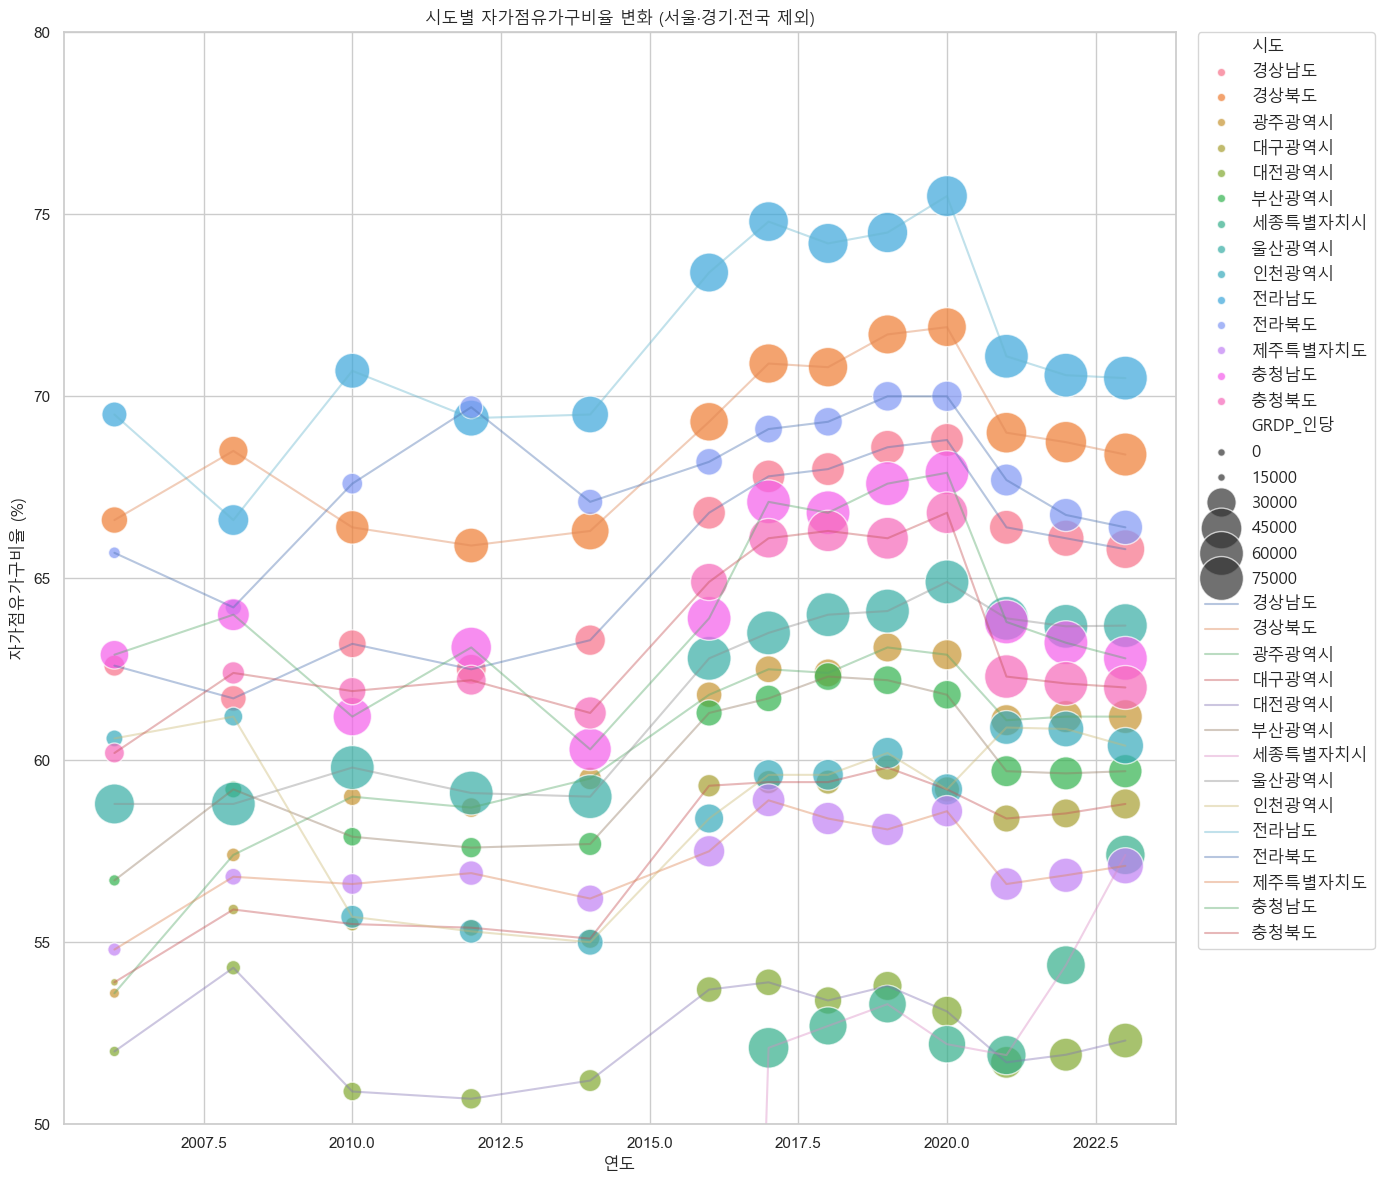

In [76]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(14, 12))
sns.set(style="whitegrid")

# 그래프
sns.scatterplot(
    data=df_plot,
    x='연도',
    y='자가점유가구비율',
    hue='시도',
    size='GRDP_인당',
    sizes=(30, 1000),   # 최소~최대 점 크기 범위 지정
    alpha=0.7,
    size_norm=Normalize(vmin = 15000, vmax = 50000)
)

# 시도별 선 연결
for 시도, group in df_plot.groupby('시도'):
    plt.plot(group['연도'], group['자가점유가구비율'], alpha=0.4, label=시도)

# 제목과 축 라벨
plt.title("시도별 자가점유가구비율 변화 (서울·경기·전국 제외)", fontproperties=font_prop)
plt.xlabel("연도", fontproperties=font_prop)
plt.ylabel("자가점유가구비율 (%)", fontproperties=font_prop)
plt.ylim([50, 80])

# 범례는 시도만
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop=font_prop)

plt.tight_layout()
plt.show()

In [ ]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시도 목록 및 색상 설정
시도_list = df_m['시도'].unique()
palette = sns.color_palette("hsv", len(시도_list))  # 시도 수만큼 색상 생성
color_map = dict(zip(시도_list, palette))  # 시도 → 색상 매핑

# 3D figure 생성
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 시도별로 점 그리기
for 시도 in 시도_list:
    subset = df_plot[df_plot['시도'] == 시도]
    ax.scatter(
        subset['연도'],
        subset['자가점유가구비율'],
        subset['지가지수'],
        color=color_map[시도],
        label=시도,
        s=90,
        alpha=0.7
    )

# 축 라벨 및 제목
ax.set_xlabel('연도', fontproperties=font_prop, labelpad = 20)
ax.set_ylabel('자가점유가구비율 (%)', fontproperties=font_prop)
ax.set_zlabel('지가지수', fontproperties=font_prop)
ax.set_title('3차원 산점도: 연도 vs 자가점유율 vs 지가지수 (지역별 색상)', fontproperties=font_prop, fontsize=16)

# 범례 추가
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop=font_prop)

plt.tight_layout()
plt.show()